In this notebook, I wrote a plot function for the resulting tif files of the DEM, DSM and Vegetaion

In [1]:
#import packages

import numpy as np
import rioxarray
import glob
import os
import matplotlib.pyplot as plt

In [6]:
def plot_raster(file, robust_ = True, cmap_ = 'viridis', bar_label = '' , bar_orientation = 'horizontal'):
    # Set font size and font family of matplotlib for plotting
    plt.rcParams.update({'font.size': 18})
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

    #create a figure and axes elements
    fig, ax = plt.subplots(figsize=(15,12), constrained_layout=True)

    #read in the raster
    raster = rioxarray.open_rasterio(file, masked=True)

    #plot the raster
    raster.plot(ax=ax, cmap = cmap_, robust = robust_, cbar_kwargs={'label': bar_label, 'orientation': bar_orientation})

    #set title
    ax.set_title('')

    #set axis labels
    ax.set_xlabel('UTM Easting (m)')
    ax.set_ylabel('UTM Northing (m)')

    #Don't use scientific notation for the axis labels
    ax.ticklabel_format(useOffset=False)

    #save the figure
    plt.savefig(file[:-4] + '.jpeg', dpi=500)


    plt.show()

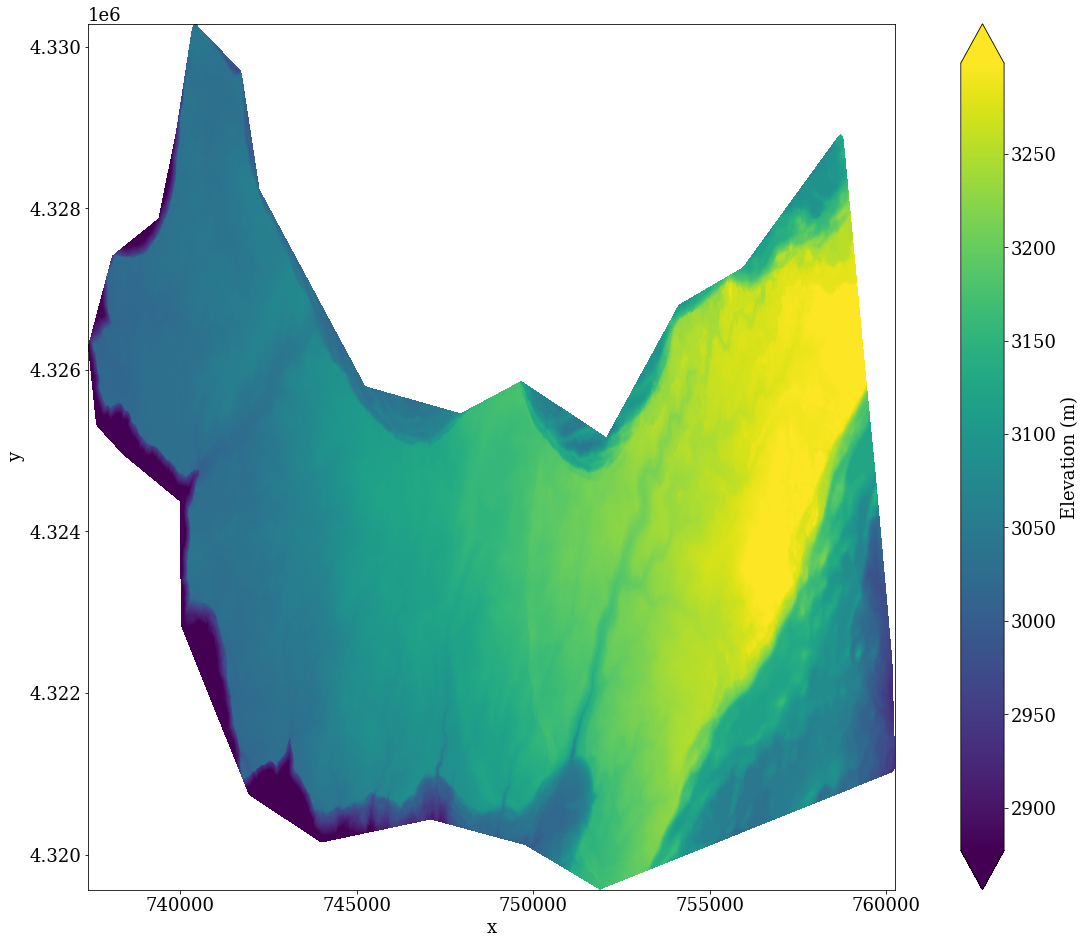

In [7]:
file = '/home/naheemadebisi/snow-analytics/lidar/results/GrandMesa2020_F1/GrandMesa2020_F1_Bare_Earth_DEMs_mosaic.tif'

plot_raster(file, bar_label= 'Elevation (m)')

In [ ]:
#list all the folders in the directory
folders = glob.glob('/home/naheemadebisi/snow-analytics/lidar/results/*')

for folder in folders:
    #Get the DEM file in each folder
    file = glob.glob(folder+'/*Bare_Earth_DEMs_mosaic.tif')[0]
    plot_raster(file, bar_label= 'Elevation (m)')